In [10]:
# 트랜스포머의 인코딩 부분이 bert, 디코딩 부분은 GPT임
# 컴퓨터 비전 파이프라인
# 영상도 여러장의 이미지로 구성되므로 시계열 데이터라고도 할 수 있음
# CNN은 라벨과 함께 이미지의 특징을 찾아내는 기능을 가짐
# 윤곽선 추출 - 추출된 윤곽선을 조합하여 
# hex #056432 이런식으로 색상을 헥사코드로 표현이 되는데 #은 16진수를 의미함
# 이미지는 이미지 표준화(사이즈를 같게)를 진행하는 것이 좋음(CNN은 해야만 함)
# gan같은 것으로 이미지를 생성하여 그것을 학습 데이터로 사용하는 것은 조작된 데이터 학습이라고 할 수 있으므로 주의해야됨

# 부스팅, 스태킹.. 나중에 해볼 것들임
# 특징 추출은 뉴런간 연결에 부여된 가중치를 통해 출력에 미치는 각 특징의 중요도를 학습함
# 위와 같은 점은 사람이 직접 추출한 특징을 필요로 하는 기존 머신러닝 모델과의 차이점임
# 뉴런은 그림에서는 동그라미로 표시됨(노드라고 보면 됨)

# 10x10의 이미지이며 그레이채널이라면 전체 픽셀수는 100이므로 100차원 데이터임
# 이미지를 분류할 때 ann을 사용할 수는 있으나 cnn이 훨씬 좋음
# 과적합을 해소하기 위해 dropout을 진행하였고 이에 따라 과적합의 빈도가 크게 줄어듦(논문에 작성됨)
# 매 배치(batch)마다 새로운 dropout 노드를 설정하여 제외시키게 됨
# 어떤 노드가 가중치가 너무 커지면 학습에서는 잘 되더라도 테스트 데이터에서는 타 노드까지 고려해야되는 상황이 있을 수 있음

# 예를 들면 사람을 평가할 때 사람의 전체를 보고 평가를 할 수도 있지만 그 사람의 성격을 보고 평가하는 등 몇 가지의 기준으로 축소를 할 수도 있음
# 다양한 관점에서 사람을 평가하는 것을 dropout과 유사하다고 볼 수 있음

# CNN, DNN, ANN에서 가중치는 커널(=특징=필터)이라고 함
# 필터값은 어떻게 결정되는가? = 처음엔 랜덤값이지만 나중에 특징이 검출되면서 특정값으로 변하게 됨
# 정확히는 학습을 통해 발견된 데이터들의 패턴임.
# 합성곱 연산을 반복하면 결과물은 점차 작아짐

CNN 튜토리얼
https://www.kaggle.com/code/tanyildizderya/convolutional-neural-network-cnn-tutorial

In [14]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [15]:
train = pd.read_csv("digit-recognizer/train.csv")
test = pd.read_csv('digit-recognizer/test.csv')
print(train.shape) # 라벨: 1, 데이터: 784(28*28)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

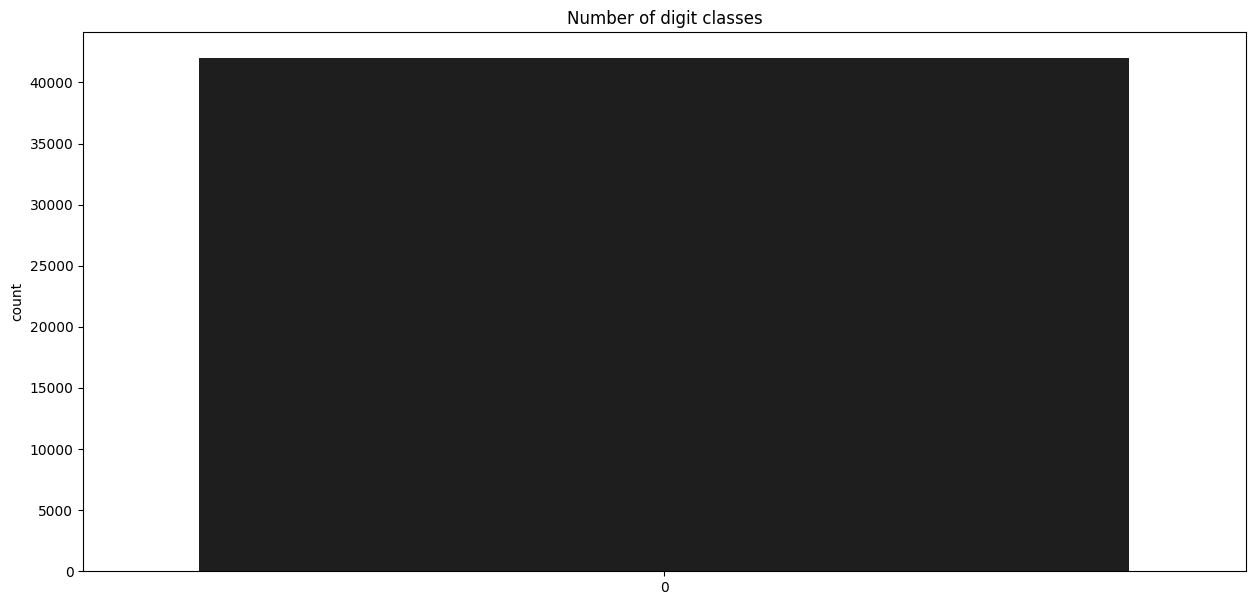

In [18]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()
plt.show()

원래는 바차트 10개정도 나오는데 왜인지 안나옴

In [19]:
Y_train[0]

1

In [20]:
img=X_train.iloc[0].to_numpy().reshape(28,28)
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

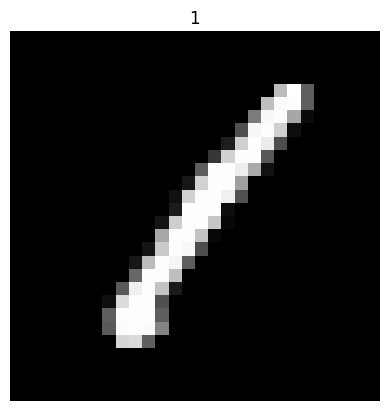

In [21]:
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

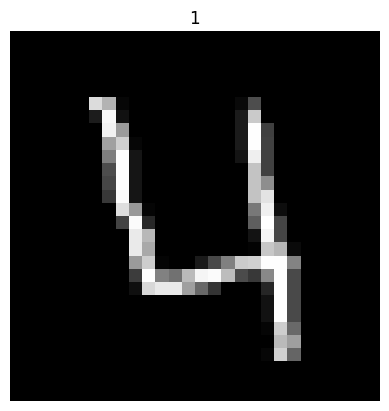

In [22]:
img=X_train.iloc[3].to_numpy().reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [23]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [24]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [25]:
# Label Encoding 
# from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.utils import to_categorical # 안되면 이 코드로 변경하면 됨
Y_train = to_categorical(Y_train, num_classes = 10)

In [26]:
Y_train # 0이 1,0,0,0,... 1은 0,1,0,0,..

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


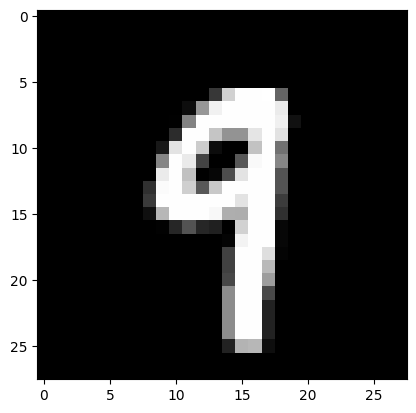

In [28]:
plt.imshow(X_train[2][:,:,0], cmap='gray')
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [30]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [31]:
epochs = 10 
batch_size = 250

In [32]:
# data augmentation 이미지 증식
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [33]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 17s 37ms/step - loss: 1.1560 - accuracy: 0.6125 - val_loss: 0.2448 - val_accuracy: 0.9310
Epoch 2/10
151/151 [==============================] - 5s 32ms/step - loss: 0.4453 - accuracy: 0.8603 - val_loss: 0.1367 - val_accuracy: 0.9626
Epoch 3/10
151/151 [==============================] - 5s 32ms/step - loss: 0.3190 - accuracy: 0.9001 - val_loss: 0.1062 - val_accuracy: 0.9700
Epoch 4/10
151/151 [==============================] - 5s 32ms/step - loss: 0.2620 - accuracy: 0.9182 - val_loss: 0.0891 - val_accuracy: 0.9731
Epoch 5/10
151/151 [==============================] - 5s 33ms/step - loss: 0.2349 - accuracy: 0.9269 - val_loss: 0.0793 - val_accuracy: 0.9748
Epoch 6/10
151/151 [==============================] - 5s 32ms/step - loss: 0.2105 - accuracy: 0.9334 - val_loss: 0.0721 - val_accuracy: 0.9788
Epoch 7/10
151/151 [==============================] - 5s 32ms/step - loss: 0.1932 - accuracy: 0.9387 - val_loss: 0.0658 - val_accuracy: 0.981

위 코드에서 이미지 증식을 시키고 증식된 이미지는 학습하면 버림

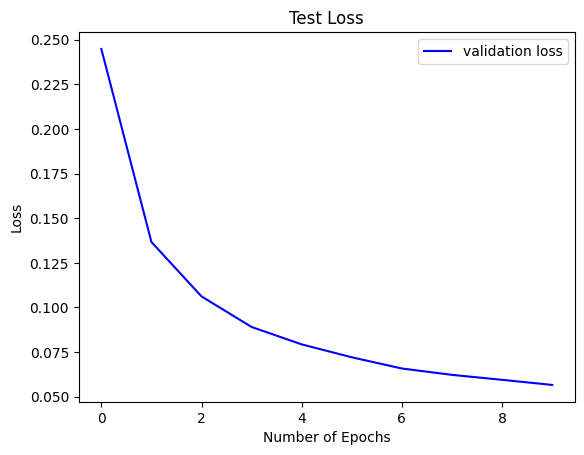

In [34]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

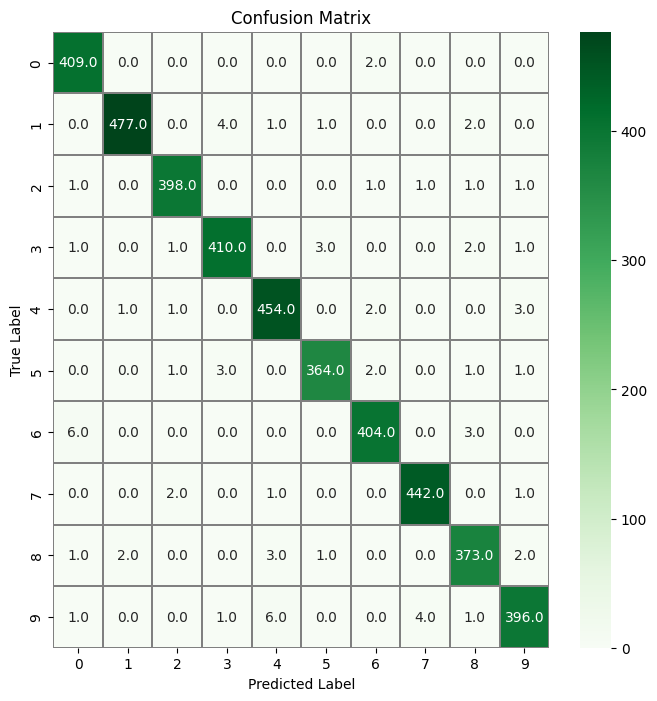

In [35]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# 낼 오전 rnn, lstm 진행
# 오후 회의